In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src

In [3]:
using JLD2, Distributions

# Computation of Sobol Indices

In [4]:
N = 5000
t_fixed = true
t_end = 100.0
M = Int(t_end * 10); # pick M solution trajectory time points for computing indices
#M = 200;

1000

## analysis for different parameter densities

In [5]:
# define densities that are consistent
dens_m = Uniform(0.45-0.45*0.1,0.45+0.45*0.1)

Uniform{Float64}(a=0.405, b=0.495)

### Region 1

In [147]:
dens_a = Uniform(0.0,0.8)
dens_n0 = Uniform(0.0,2.0)
dens_w0 = Uniform(0.0,2.0)
sobol_n, sobol_w = compute_sobol_indices(N, dens_a, dens_m, dens_w0, dens_n0, M, t_fixed, t_end)

(Dict{Symbol}[Dict(:firstorder => [0.0, 0.0, 0.0, 1.0004919233305398], :totalorder => [0.0, 0.0, 0.0, 1.0004849713305854]), Dict(:firstorder => [7.0814219240586706e-6, 8.53705080164418e-6, 0.013664762877826177, 0.9762378122795607], :totalorder => [1.1719710949057496e-5, 2.759907456124116e-5, 0.025112010377955206, 0.9864631132795839]), Dict(:firstorder => [7.860595610319055e-5, 3.669783886295884e-5, 0.03906376698464451, 0.9331916093531412], :totalorder => [0.00015178710762178569, 0.00010523400695055262, 0.06838470134592704, 0.960549788041678]), Dict(:firstorder => [0.00029391607836572767, 6.564851776685084e-5, 0.06118501218246434, 0.9002739337580167], :totalorder => [0.000575565971208085, 0.000220803832283048, 0.1008173155971912, 0.9379116099024479]), Dict(:firstorder => [0.0007267914245039746, 0.00012329362869915582, 0.07746440261059315, 0.8792844019015129], :totalorder => [0.0013625702728011307, 0.00037174961496265165, 0.1208928957849442, 0.9211845861503722]), Dict(:firstorder => [0.0

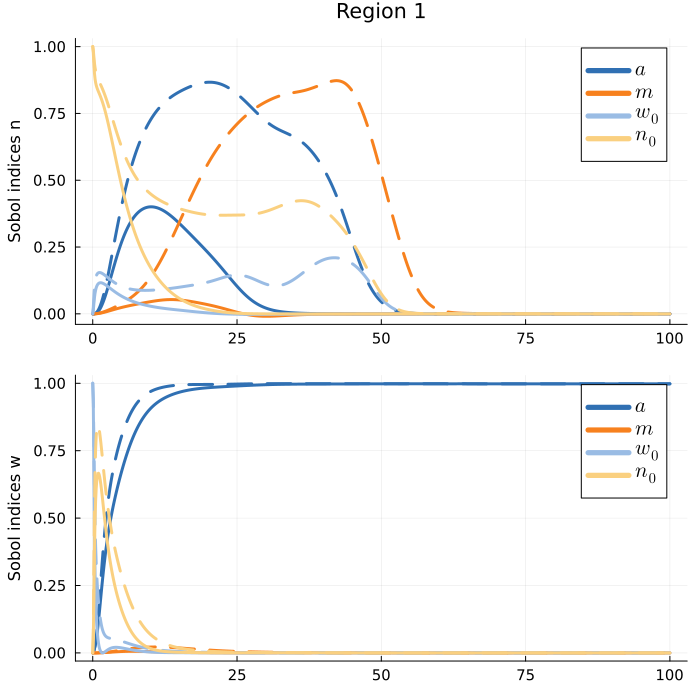

In [55]:
sobol_index_subplot_wn(sobol_n, sobol_w, title="Region 1")

Interpretation:
- system always converges to stable state. Indices in w,n compartment indicate maximal time needed for convergence. Once convergence is reached, very little variance in n comparment (see pi left of bifurcation point). Point it converges to (i.e. 0) does not depend on input parameters.
- n0 matters until convergence is reached
- value in stable state: w=a, thus a sensitive in w compartment -> observation of w trajectory enables to infer a value.
- n compartment: 
- large parameter interactions present in n compartment: sensitivity arises mostly due to interactions between a,m,n0

### Region 2

In [56]:
dens_a = Uniform(0.8,1.0)
dens_n0 = Uniform(0.5,1.5)
dens_w0 = Uniform(0.0,0.9)
sobol_n, sobol_w = compute_sobol_indices(N, dens_a, dens_m, dens_w0, dens_n0, M, t_fixed, t_end)

([Dict(:firstorder => [0.0, 0.0, 0.0, 1.0004919233305398], :totalorder => [0.0, 0.0, 0.0, 1.0004849713305854]), Dict(:firstorder => [1.2829839059169737e-6, 6.128323955292212e-5, 0.007159800410537499, 0.9912563774849459], :totalorder => [1.2508922928047477e-6, 8.542193492805587e-5, 0.009436745099029776, 0.9929999697289728]), Dict(:firstorder => [1.2813929174911598e-5, 0.00026207014155808046, 0.02243661330663247, 0.9717587698383421], :totalorder => [1.659385105803874e-5, 0.00032966033353226703, 0.028908485214854774, 0.9773170849143272]), Dict(:firstorder => [5.197717567668014e-5, 0.0005831992940467759, 0.03955675185545041, 0.9502425856533393], :totalorder => [6.995670786529641e-5, 0.0007156430072939481, 0.050146454041611783, 0.9596866586629965]), Dict(:firstorder => [0.000137134015296425, 0.0010130351584095678, 0.055682778083359356, 0.9303676890821045], :totalorder => [0.0001852689329574074, 0.0012308928714359925, 0.06949013947737857, 0.9429241859759617]), Dict(:firstorder => [0.00028440

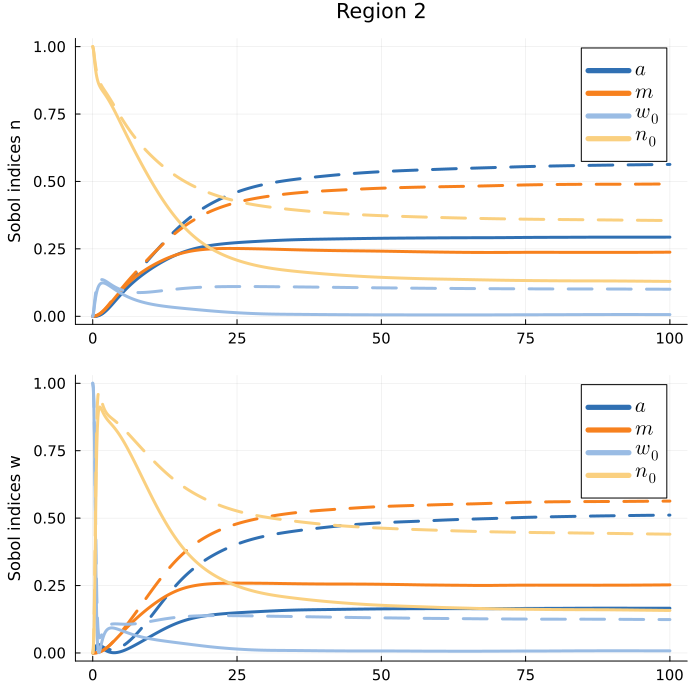

In [57]:
sobol_index_subplot_wn(sobol_n, sobol_w, title="Region 2")

Interpretation:
- in general high sensitivity, because we have alterante convergence to different eq.pts.
- a,m decide location of bif. pt. -> high influence on to which eq.pt. system converges, because if e.g. eq. lies at sampling border, we converge to pf. eq. independently on inits.
- convergence behaviour is mainly decided by bif. pt. and in w compartment m has more influence on bifurcation location than a. In n comparment both have same influence on bifurcation location, however sampling range of a is larger, which might be why it appears more sensitive
- n0 more sensitive than w0 indicates that biomass trajectories show greater variability when simulating the model, and independently of initial condition course of w is less variable than the course of n (this is also later verified by forward uq)

### Region 3

In [69]:
dens_a = Uniform(1.0, 2.0)
dens_n0 = Uniform(0.8,2.0)
dens_w0 = Uniform(0.0,0.6)
sobol_n, sobol_w = compute_sobol_indices(N, dens_a, dens_m, dens_w0, dens_n0, M, t_fixed, t_end)

([Dict(:firstorder => [0.0, 0.0, 0.0, 1.0004919233305398], :totalorder => [0.0, 0.0, 0.0, 1.0004849713305852]), Dict(:firstorder => [5.991595574121874e-5, 8.82190607407183e-5, 0.0073035492023685354, 0.9915662435168472], :totalorder => [6.94395026640274e-5, 0.00011370212337593871, 0.008957803575229984, 0.9927868894701732]), Dict(:firstorder => [0.0007200745309555074, 0.00037125547202571563, 0.0209390841040195, 0.9747194788426352], :totalorder => [0.000859825481278252, 0.00044041603831769624, 0.024815602510349966, 0.9780572804133969]), Dict(:firstorder => [0.0028997884906377448, 0.0008350649425988753, 0.03441678088655692, 0.9567809628408325], :totalorder => [0.0034353309138432137, 0.0009632286331628537, 0.0397260807391535, 0.9618367516984413]), Dict(:firstorder => [0.007469672527027778, 0.001476804760365402, 0.045717492839374936, 0.939018964129059], :totalorder => [0.008722073041603553, 0.0016713325067697633, 0.05154482418543192, 0.9452449565660069]), Dict(:firstorder => [0.0151304184804

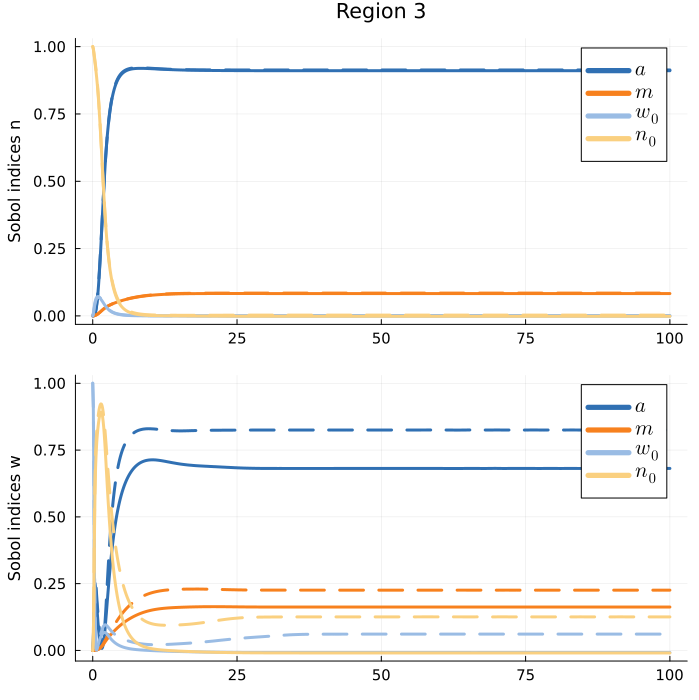

In [70]:
sobol_index_subplot_wn(sobol_n, sobol_w, title="Region 3")

Interpretation:
- w comparment: value of w depends on a, which is why a is sensitive, but also on m, because m shifts bifurcation branch as well
- n comparment: value of n depends heavily on a (value system converges to), but also a little on m, as m shifts the bifurcation curve significantly.

### Region 4

In [6]:
using DataStructures, GlobalSensitivityAnalysis, LaTeXStrings, Plots


In [7]:
function sobol_index_subplot_fo(sobol::Vector, comp::String; title::String="", M::Int64=1000, t_fixed::Bool=true, t_end::Float64=100.0)

    #colors = [:blue, :turquoise, :orange, :red]
    colors = [
        "#3070B3",  # a   → TUM blue brand
        "#F7811E",  # m   → TUM orange
        "#9ABCE4",  # w0  → TUM blue light-dark
        "#FAD080"   # n0  → TUM orange-2
    ]
    parameters = [L"$a$", L"$m$", L"$w_0$", L"$n_0$"];

    # extract indices for plotting
    fo = [sobol[i][:firstorder] for i in 1:M]
    to = [sobol[i][:totalorder] for i in 1:M]

    # very stupid way to create time axis
    hprm = Src.Hyperprm(1,1,1,1,M,0.0)
    sol = Src.sol_klausmeier(hprm, t_fixed=t_fixed, t_end=t_end)
    times = sol[!,"time"]

    si_plot = plot(legend=:topright)

    for k in 1:4
        col = colors[k]
        prm = parameters[k]
        plot!(times, getindex.(fo, k), label="$prm", lw=3, color=col, linestyle=:solid, legendfontsize=14, xtickfontsize=10, ytickfontsize=10)
        #plot!(times, getindex.(to, k), label="", lw=3, color=col, linestyle=:dash, legendfontsize=14, xtickfontsize=10, ytickfontsize=10)
    end
    #xlabel!("Time")
    ylabel!("Sobol indices $comp")
    title!(title)
    return si_plot
end

function compute_sobol_indices(N::Int64, dens_a::Distribution, dens_m::Distribution, dens_w0::Distribution, dens_n0::Distribution,
    M::Int64, t_fixed::Bool, t_end::Float64; var_threshold::Float64=1e-15)

    # create Sobol data
    data = SobolData(
        params = OrderedDict(:a => dens_a,
        :m => dens_m,
        :w0 => dens_w0,
        :n0 => dens_n0),
        calc_second_order = false,
        N=N
    )
    # create samples
    samples = GlobalSensitivityAnalysis.sample(data)

    # evaluate model on sample matrix
    n, w = zeros(size(samples, 1),M), zeros(size(samples, 1),M)
    for i in 1:size(samples, 1) 
        a, m, w0, n0 = samples[i, :]
        hprm = Hyperprm(w0,n0,a,m,M,0.0) # no noise included
        sol = sol_klausmeier(hprm, t_fixed=t_fixed, t_end=t_end)
        n[i,:], w[i,:] = sol[!, "n"], sol[!, "w"]
    end

    function safe_analyze(data, Y_col)
        # Calculate variance of the current time step output
        current_var = var(Y_col)
        
        if current_var < var_threshold
            # If variance is effectively zero, return zeros.
            param_names = keys(data.params)
            num_params = length(param_names)
            return Dict{Symbol, Any}(
                :firstorder => zeros(num_params),
                :totalorder => zeros(num_params)#,
                #:firstorder_conf => zeros(num_params),
                #:totalorder_conf => zeros(num_params)
            )
        else
            return analyze(data, Y_col, progress_meter=false, num_resamples=nothing, conf_level=nothing)
        end
    end

    # compute sobol indices
    sobol_n = [safe_analyze(data, n[:, j]) for j in 1:M]
    sobol_w = [safe_analyze(data, w[:, j]) for j in 1:M]

    return sobol_n, sobol_w, n, w
end

compute_sobol_indices (generic function with 1 method)

In [8]:
Src.n(2.0, 0.405, false)

0.21156374137453973

In [43]:
N=5000
dens_a = Uniform(1.0, 2.0)
dens_n0 = Uniform(0.0, 0.188)
dens_w0 = Uniform(1.9,3.0)
sobol_n, sobol_w, n,w = compute_sobol_indices(N, dens_a, dens_m, dens_w0, dens_n0, M, t_fixed, t_end, var_threshold=0.0)

([Dict(:firstorder => [0.0, 0.0, 0.0, 1.00049192333054], :totalorder => [0.0, 0.0, 0.0, 1.0004849713305854]), Dict(:firstorder => [4.0873798774564606e-7, 9.100028823780793e-6, 2.621064262290919e-5, 1.0004419856076885], :totalorder => [1.6543508845762517e-7, 2.7437265397736213e-5, 7.904384020935242e-5, 1.0004115503233668]), Dict(:firstorder => [2.63773355796047e-6, 5.84921383149461e-5, 0.0001261869742531604, 1.0001997778485043], :totalorder => [2.475637081473758e-6, 0.00011091835283911633, 0.0002906763538027297, 1.0002286916437002]), Dict(:firstorder => [9.314351243641393e-6, 0.00014805864218446957, 0.00027872126762362666, 0.9997911636628023], :totalorder => [1.1720341025652104e-5, 0.000252078245930225, 0.000602148784276364, 0.9999543525863541]), Dict(:firstorder => [2.4027187262192686e-5, 0.00027754480680718607, 0.0004671736658808191, 0.9992339989570178], :totalorder => [3.4643856421253495e-5, 0.0004524016611169061, 0.0009871241994308315, 0.9996011628219622]), Dict(:firstorder => [5.07

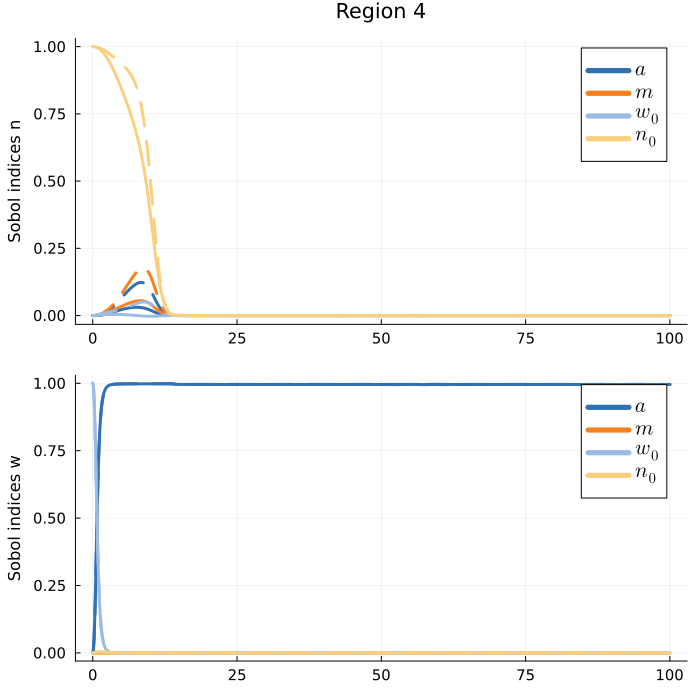

In [64]:
sobol_index_subplot_wn(sobol_n,sobol_w,title="Region 4")

In [44]:
var(n, dims=1)

1×1000 Matrix{Float64}:
 0.00294539  0.00294604  0.00293577  0.00291532  …  0.000735538  0.000735538

In [58]:
count(row -> any(>(0.01), row), eachrow(n[:, 250:end]))

1

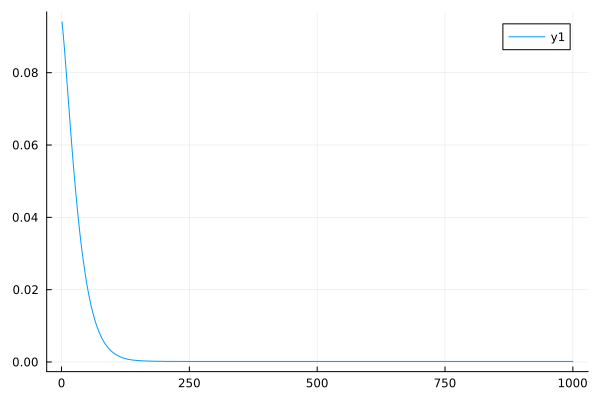

In [50]:
plot(mean(n, dims=1)')

In [45]:
maximum(n, dims=1)

1×1000 Matrix{Float64}:
 0.187977  0.190232  0.19242  0.194535  …  4.69746  4.69746  4.69746  4.69746

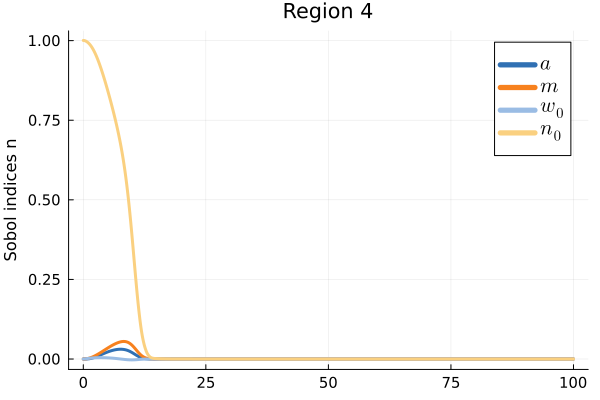

In [ ]:
sobol_index_subplot_fo(sobol_n, "n", title="Region 4") 

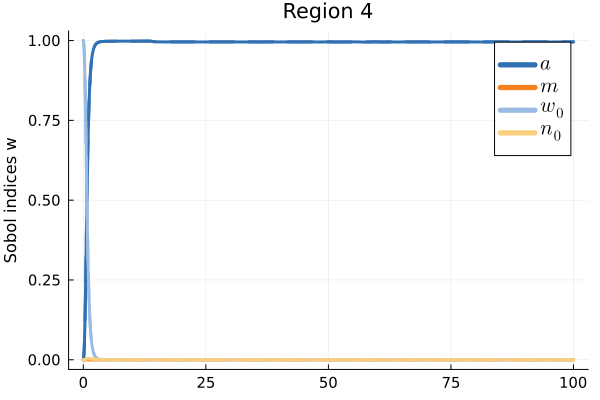

In [62]:
sobol_index_subplot(sobol_w, "w", title="Region 4") # 5000 no th

In [142]:
n_var = var(n, dims=1)

1×1000 Matrix{Float64}:
 0.00187504  0.00184107  0.00180147  0.00175703  …  2.75844e-29  2.52493e-29

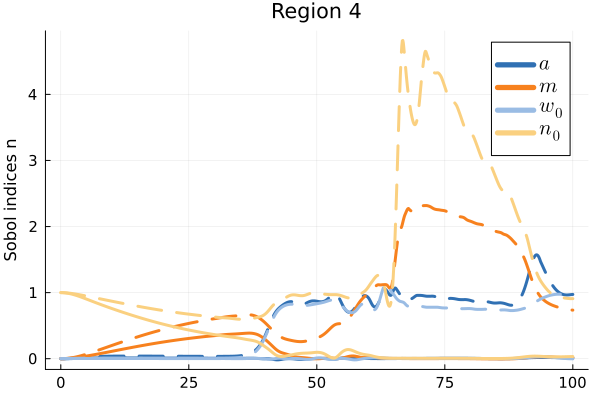

In [127]:
sobol_index_subplot(sobol_n, "n", title="Region 4") # no threshold, 15.000 samples

In [128]:
n_var = var(n, dims=1)

1×1000 Matrix{Float64}:
 0.00187501  0.00184101  0.00180138  0.00175691  …  2.6508e-29  2.42763e-29

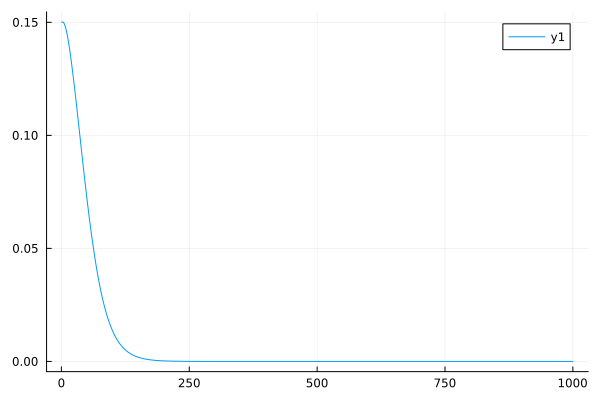

In [143]:
using(Plots)
plot(maximum(n, dims=1)')

In [144]:
n_mean = mean(n, dims=1)

1×1000 Matrix{Float64}:
 0.0750121  0.0734434  0.0718201  0.0701529  …  -4.12852e-16  -3.94916e-16

Interpretation:
- w compartment: same interpretation as in case left of bifurcation
- n comparment: converges faster than in case 1.
- very fast convergence, because system starts near equlibria -> can be seen in n comparment,e.g. n0 trajectory.
- it seems like after convergence is reached, parameter interactions appear.
-> maybe pick one point there in inverse UQ procedure